In [1]:
import pandas as pd
import numpy as np
import glob, os
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("MOUSE_A_clean.csv")
df.loc[11]

Unnamed: 0              55.0
Orbital                  NaN
Nose                     NaN
Ears                     NaN
Whiskers                 NaN
Confidence(Orbital)      NaN
Confidence(Nose)         NaN
Confidence(Ears)         NaN
Confidence(Whiskers)     NaN
Name: 11, dtype: float64

In [48]:
def read_files(root, mouse):
    os.chdir(root)
    csv_files = glob.glob('*.csv')
    csv_files = sorted(list(csv_files))
    
    # only includes data csv files named based on starting second to ending second naming system
    # does not remerge finished csv with original data files if this is run twice
    csv_files = [f for f in csv_files if f[:1].isdigit()]
    
    global data
    data = pd.DataFrame()

    i=0
    last_ts = 0
    last_frame = 0
    for f in csv_files:
        df = pd.read_csv(f)
        df, last_ts, last_frame = adjust_indices(df, last_ts, last_frame)
        df.insert(0, "Interval", len(df.index.values)*["Clip " + str(i+1) + ": " + str(f)][:3])
        data = pd.concat([data, df])
        i += 1
        
    data.index = pd.Index(range(len(data.index)))

def adjust_indices(df, ts, frame):
    df.loc[:, "Frame Index"] = df.loc[:, "Frame Index"].values + frame
    df.loc[:, "Timestamp(x)"] = df.loc[:, "Timestamp(x)"].values + ts
    return df, ts+30, frame+7200

def save_full_csv(root, mouse):
    os.chdir(root)
    output = mouse + '.csv'
    data.to_csv(output)
    
def save_ctrl_vs_treated(root, mouse, st, click):
    os.chdir(root)
    before = mouse + '_control.csv'
    after = mouse + '_treated.csv'
    st = float(str(st).zfill(3))
    click = float(str(click).zfill(3))
    ctrl = data.loc[data["Timestamp(x)"] <= st] # split across before and after
    treated = data.loc[data["Timestamp(x)"] >= click]
    ctrl.to_csv(before)
    treated.to_csv(after)
    
    
def save_ctrl_vs_treated2(root, mouse, vid1, frame_st, vid2, frame_click,):
    """
        Alternate helper method which reads in user friendly inputs. Get index numbers
        and starting times of filenames from PainFace.
    """
    os.chdir(root)
    before = mouse + '_control.csv'
    after = mouse + '_treated.csv'
    #vid1 = 
    ctrl = data.loc[data["Frame Index"] <= frame_st+vid1*240] # split across before and after
    treated = data.loc[data["Timestamp(x)"] >= after]
    ctrl.to_csv(before)
    treated.to_csv(after)

cwd = os.getcwd()
print(cwd)
read_files(cwd, 'MOUSE_A')
save_full_csv(cwd, 'MOUSE_A')
save_ctrl_vs_treated(cwd, 'MOUSE_A', 170, 240)
data

/Users/sense_imac3/Documents/GitHub/cv-for-nasal-pain-assay/MOUSE_A


,Interval,Subject Type,Frame Index,Timestamp(x),Orbital,Nose,Ears,Whiskers,Cheek,Total Grimace Score,AU Scored,Confidence(Orbital),Confidence(Nose),Confidence(Ears),Confidence(Whiskers),Confidence(Cheek),Face Model,MGS Model
0,Clip 1: 000.csv,c57bl/6,0,0.000,1,-1,2,-1,NaN,NaN,2,0.764252,0.000000,0.999628,0.0,NaN,general/fau/generalv5,c57bl6-pain-mgs-20220901
1,Clip 1: 000.csv,c57bl/6,240,1.001,1,-1,2,-1,NaN,NaN,2,0.746516,0.000000,0.999971,0.0,NaN,general/fau/generalv5,c57bl6-pain-mgs-20220901
2,Clip 1: 000.csv,c57bl/6,480,2.002,2,2,1,-1,NaN,NaN,3,0.823970,0.997830,0.999010,0.0,NaN,general/fau/generalv5,c57bl6-pain-mgs-20220901
3,Clip 1: 000.csv,c57bl/6,720,3.003,-1,-1,-1,-1,NaN,NaN,0,0.000000,0.000000,0.000000,0.0,NaN,general/fau/generalv5,c57bl6-pain-mgs-20220901
4,Clip 1: 000.csv,c57bl/6,960,4.004,-1,2,1,-1,NaN,NaN,2,0.000000,0.815368,0.999997,0.0,NaN,general/fau/generalv5,c57bl6-pain-mgs-20220901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,Clip 30: 870.csv,c57bl/6,214080,892.022,0,-1,2,-1,NaN,NaN,2,0.999509,0.000000,0.999920,0.0,NaN,general/fau/generalv5,c57bl6-pain-mgs-20220901
893,Clip 30: 870.csv,c57bl/6,214320,893.023,-1,-1,1,-1,NaN,NaN,1,0.000000,0.000000,0.996046,0.0,NaN,general/fau/generalv5,c57bl6-pain-mgs-20220901
894,Clip 30: 870.csv,c57bl/6,214560,894.024,-1,-1,-1,-1,NaN,NaN,0,0.000000,0.000000,0.000000,0.0,NaN,general/fau/generalv5,c57bl6-pain-mgs-20220901
895,Clip 30: 870.csv,c57bl/6,214800,895.025,-1,-1,-1,-1,NaN,NaN,0,0.000000,0.000000,0.000000,0.0,NaN,general/fau/generalv5,c57bl6-pain-mgs-20220901


In [293]:
csv = pd.read_csv("sampling-rate/mouse_a_viables.csv")

def clean_viables(csv):
    csv.columns = csv.loc[4]
    csv = csv.drop(list(range(5)))
    csv.index = pd.Index(range(len(csv.index)-5))
    csv = csv.drop(columns=['Clip number'])
    return csv

def to_dict(csv, fau_names):
    arrs = dict(csv)
    for k in fau_names:
        arrs[k] = dict(arrs[k].dropna())
        for i in arrs[k].keys():
            vals = arrs[k][i].split(',')
            #temp = []
            #for v in vals:
                #if v.isdigit():
                    #temp.append(int(v))
            vals = [int(v) for v in vals]
            arrs[k][i] = vals
    return arrs

#clean = clean_viables(csv)
csv

,"If all boxes in a category are correct, but there is an extra box which is not correct, it's counted as 0",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,FAU 1 and 2 labels do not correspond with FAU ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Put frame identities under each column, not to...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Video name:,MOUSE_A.MP4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Frame Indices:,NaN,NaN,get from code,NaN,NaN
4,Clip number,Start of interval (s),Orbital 1,Orbital 2,Nose,Whiskers,Ear 1,Ear 2,Viable indices,Notes,NaN
5,1,0,9,NaN,NaN,NaN,"0, 1, 2, 4",NaN,9,barely,NaN
6,2,30,"11, 23, 24, 25",NaN,NaN,NaN,"2, 4, 5, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18...","14, 15, 16, 22, 29","11, 24, 25",23 has 1 correct orbital box and 1 incorrect b...,NaN
7,3,60,"4, 8, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, ...",20,"5, 18, 19, 20, 22, 23, 24, 25, 26",NaN,"0, 1, 2, 3, 4, 5, 6, 9, 13, 15, 16, 17, 18, 19...","9,13, 20",NaN,"8,16 have 1C/1NC orbital box",23 has 1C/1NC ears
8,4,90,"0, 3, 4, 5, 6, 13, 14, 15, 16, 26",13,"1, 2, 3, 4, 5, 12, 13, 14, 15, 16, 17, 23",NaN,"0, 1, 2, 4, 6, 7, 13, 14, 15, 16, 17, 19, 21, ...","16, 19, 24",NaN,6 has face box,17 has 1C/1NC ears
9,5,120,"1, 2, 3, 4, 5, 6, 13, 14, 15, 16, 17, 22, 23",13,"2, 4, 5, 6, 12, 13, 14, 15, 16, 23",NaN,"1, 2, 4, 5, 11, 13, 14, 15, 16, 17, 19, 21, 22...","13, 15, 16, 19, 24",NaN,NaN,NaN


In [292]:
faus = ['Orbital 1', 'Orbital 2', 'Nose', 'Whiskers', 'Ear 1', 'Ear 2']
arrs = to_dict(clean,faus)
arrs

{'Start of interval (s)': 0       0
 1      30
 2      60
 3      90
 4     120
 5     150
 6     180
 7     210
 8     240
 9     270
 10    300
 11    330
 12    360
 13    390
 14    420
 15    450
 16    480
 17    510
 18    540
 19    570
 20    600
 21    630
 22    660
 23    690
 24    720
 25    750
 26    780
 27    810
 28    840
 29    870
 Name: Start of interval (s), dtype: object,
 'Orbital 1': {0: [9],
  1: [11, 23, 24, 25],
  2: [4, 8, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
  3: [0, 3, 4, 5, 6, 13, 14, 15, 16, 26],
  4: [1, 2, 3, 4, 5, 6, 13, 14, 15, 16, 17, 22, 23],
  5: [17, 18, 19, 20],
  7: [27, 28, 29],
  8: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 14],
  9: [1, 3, 4, 5, 7, 8, 9, 11, 12, 13, 15, 19, 20, 21, 22, 25],
  10: [1, 2, 3, 4, 15, 16, 21, 22, 23, 24, 25, 26, 27],
  11: [1, 3, 8, 10, 11, 14],
  12: [20, 23, 24, 29],
  13: [23, 25, 26]},
 'Orbital 2': {2: [20], 3: [13], 4: [13]},
 'Nose': {2: [5, 18, 19, 20, 22, 23, 24, 25, 26],
  3: [1, 2, 3, 4, 5, 12, 13

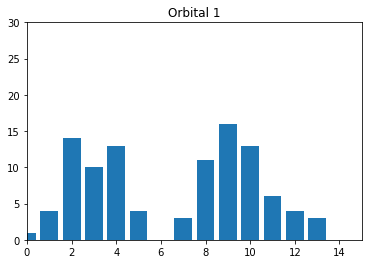

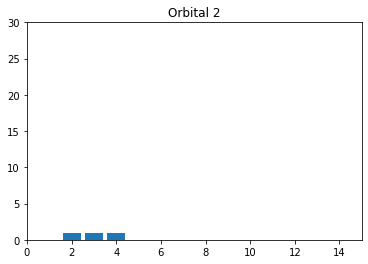

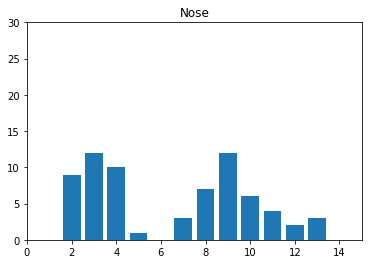

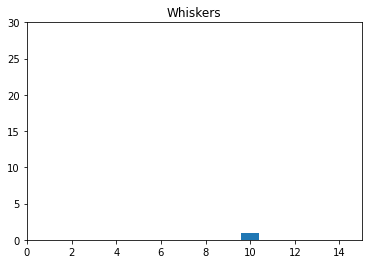

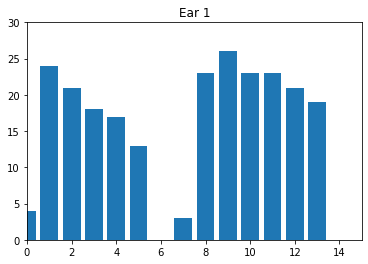

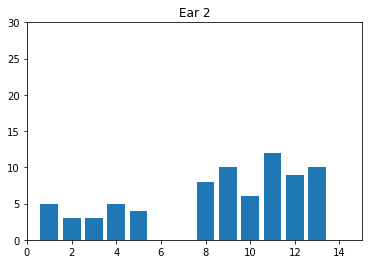

<Figure size 432x288 with 0 Axes>

In [288]:
for f in faus:
    d = arrs[f]
    counts = [len(v) for v in d.values()]
    plt.title(f)
    plt.xlim(0, 15)
    plt.ylim(0, 30)
    plt.bar(d.keys(), counts)
    plt.show()
    plt.savefig(f+'.png')

In [245]:
FAU_NAMES = data.columns[3:7]
CONF_NAMES = data.columns[10:14]

# have user input viable indices where bounding boxes are accurate
viables = [11, 24, 25]
faus = data.loc[viables, FAU_NAMES]
fau_arr = np.asarray(faus)
confs = data.loc[viables, CONF_NAMES]
conf_arr = np.asarray(confs)

clean_data = faus.join(confs)
clean_data

,Timestamp(x),Orbital,Nose,Ears,AU Scored,Confidence(Orbital),Confidence(Nose),Confidence(Ears)
11,11.011,-1,-1,-1,0,0.000000,0.000000,0.000000
24,24.024,0,2,2,3,0.998753,0.991525,0.999983
25,25.025,1,0,1,3,0.998814,0.788076,1.000000


In [13]:
fau_arr
conf_arr

array([[3.        , 0.99990129, 0.        , 0.99804413],
       [2.        , 0.90824449, 0.        , 0.56698865],
       [3.        , 0.99999976, 0.        , 0.99974674]])

In [15]:
def get_all_fau_scores(data):
    """
        Get data per FAU without filtering for manually confirmed bounding box accuracy.
        Run the same analytics as with clean data on all timestamps of the data matrix without checking
        whether the bounding boxes were correctly identified at those points.
    """
    
    THRESHOLD = 0.90
    
    faus = {}
    fs_sorted = {}
    times = {}
    
    for i in range(len(FAU_NAMES)):
        fau = FAU_NAMES[i]
        conf = CONF_NAMES[i]
        
        mgs = data[fau].where(data[conf] >= THRESHOLD).dropna()
        mgs_sorted = data.sort_values(conf, ascending=False)[fau]
        sorted_arrs = np.asarray(mgs_sorted)
        print(mgs)
        #print(mgs_sorted, "\n")
        faus[fau] = np.asarray(mgs)
        print("index", mgs.index, "\n")
        times[fau] = mgs.index
        fs_sorted[fau] = sorted_arrs
    
    return faus, times, fs_sorted

def get_clean_fau_analytics():
    """
        Get clean data per FAU after filtering for high confidence scores only.
        
        For each Facial Action Unit, filter for datapoints that correspond to high confidence values.
        
        Returns 3 dictionaries with:
            - Faus: data arrays with all high confidence scores organized by FAU identity
            - Times: label arrays containing timestamp identity for each included confidence score per FAU
            - Scores sorted: dataframes containing all FAU scores sorted by confidence across each individual column
    """
    THRESHOLD = 0.90
    
    faus = {}
    fs_sorted = {}
    times = {}
    
    for i in range(len(FAU_NAMES)):
        fau = FAU_NAMES[i]
        conf = CONF_NAMES[i]
        
        mgs = clean_data[fau].where(clean_data[conf] >= THRESHOLD).dropna()
        mgs_sorted = clean_data.sort_values(conf, ascending=False)[fau]
        sorted_arrs = np.asarray(mgs_sorted)
        faus[fau] = np.asarray(mgs)
        times[fau] = mgs.index
        fs_sorted[fau] = sorted_arrs
    
    return faus, times, fs_sorted

def display_analytics_report(faus, times, fs_sorted):
    # user friendly report:
    
    tstamps = {}
    [tstamps.update({k:np.asarray(data.loc[times[k], "Timestamp(x)"])}) for k in times.keys()]
    
    print("*** COMPLETED FAU ANALYTICS ON CLEAN DATAFRAME ***\n\n")
    
    for fau in faus.keys():
        print("\n\n**", fau, "**\n\n")
        print("For", fau, "Facial Action Unit:\n")
        print("High confidence Mouse Grimace Scale scores for this clip:\n", faus[fau])
        print("\nCorresponding timestamps for high confidence MGS score:\n", tstamps[fau])
        print("\nAll viable Mouse Grimace Scale scores descending order of Confidence Score:\n", fs_sorted[fau])
    

def get_fau_scores(viables, fau, conf):
    """
        Get arrays of Facial Action Unit scores across each row of data that has been determined to be viable through visual inspection.
        IGNORE. not pursuing this anymore.
    """
    THRESHOLD = 0.90
    
    fau_mgs = {}
    for fau in FAU_NAMES:
        fau_mgs[str(fau)] = []
    
    for v in range(len(viables)):
        for fi in range(len(fau)):
            if conf[v][fi] >= THRESHOLD:
                pass
                #print(fau_mgs[list(fau_mgs.keys())[fi]], fau[v][fi])
                #fau_mgs[list(fau_mgs.keys())[fi]].append(fau[v][fi])
    
    print(fau_mgs)
    return NotImplemented



f,t,s = get_clean_fau_analytics()
display_analytics_report(f,t,s)

*** COMPLETED FAU ANALYTICS ON CLEAN DATAFRAME ***




** Timestamp(x) **


For Timestamp(x) Facial Action Unit:

High confidence Mouse Grimace Scale scores for this clip:
 [11.011 24.024 25.025]

Corresponding timestamps for high confidence MGS score:
 [11.011 24.024 25.025]

All viable Mouse Grimace Scale scores descending order of Confidence Score:
 [11.011 25.025 24.024]


** Orbital **


For Orbital Facial Action Unit:

High confidence Mouse Grimace Scale scores for this clip:
 [0 0 1]

Corresponding timestamps for high confidence MGS score:
 [11.011 24.024 25.025]

All viable Mouse Grimace Scale scores descending order of Confidence Score:
 [1 0 0]


** Nose **


For Nose Facial Action Unit:

High confidence Mouse Grimace Scale scores for this clip:
 []

Corresponding timestamps for high confidence MGS score:
 []

All viable Mouse Grimace Scale scores descending order of Confidence Score:
 [-1 -1 -1]


** Ears **


For Ears Facial Action Unit:

High confidence Mouse Grimace Scale

In [16]:
def get_clean_rows(temp):
    """
        Get clean data per row after filtering for high confidence rows only.
        
        Filter for rows that correspond to high average confidence value across Facial Action Units.
        Returns a dictionary with viable FAU scores at timepoints of accurate bounding box classification and high confidence scores across facial action units.
    """
    THRESHOLD = 0.90
    
    # insert new column with average confidence value
    if "Avg Confidence" in temp.columns.values:
        temp = temp.drop(columns=['Avg Confidence'])
    temp.insert(len(temp.columns), "Avg Confidence", np.mean(np.asarray(temp.loc[:, CONF_NAMES]), axis=1))
    filtered = temp.sort_values(by='Avg Confidence', ascending=False)
    fau = filtered.loc[:, FAU_NAMES]
    conf = filtered.loc[:, CONF_NAMES]
    avg = filtered.loc[:, 'Avg Confidence']
    filtered = fau.join(avg)
    # join confidence columns as well
    #filtered = fau.join(avg).join(conf)
    
    return filtered
    
get_clean_rows(data)

,Timestamp(x),Orbital,Nose,Ears,Avg Confidence
28,28.028,0,0,2,1.749410
52,52.022,1,0,0,1.745738
38,38.008,1,2,2,1.745405
53,53.023,1,0,0,1.720748
49,49.019,1,0,0,1.715644
56,56.026,1,0,0,1.639012
30,30.000,0,2,0,1.499948
46,46.016,0,0,2,1.499862
54,54.024,1,0,1,1.483923
50,50.020,1,2,1,1.343722
